In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('MetroPT3(AirCompressor).csv')

In [3]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [4]:
data = data.drop(['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'], axis=1)

In [5]:
# Сжатие timestamp до дней и расчет средних значений за день
daily_data = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()
daily_data.head(4)

,timestamp,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current
0,2020-02-01,35715.0,0.532965,8.968314,8.404471,-0.019066,8.970930,55.748117,1.292689
1,2020-02-02,106590.0,0.588232,8.983974,8.371383,-0.017718,8.986492,55.820082,1.382803
2,2020-02-03,185325.0,0.460627,8.946111,8.461042,-0.017899,8.948008,56.088392,1.135509
3,2020-02-04,272490.0,0.543763,8.954529,8.383129,-0.018613,8.956433,55.033116,1.240221


In [6]:
# Выделение данных для нормализации
data_to_normalize = daily_data.drop('timestamp', axis=1)

# Создание объекта нормализатора
scaler = MinMaxScaler()

# Применение нормализации к данным
normalized_data = scaler.fit_transform(data_to_normalize)

# Создание нового датафрейма с нормализованными данными
normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

# Объединение столбца 'timeshtamp' и нормализованных данных
final_data = pd.concat([normalized_df, daily_data['timestamp']], axis=1)

In [9]:
dataTP2 = final_data.drop(['timestamp', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current'], axis=1)
dataTP2 = dataTP2.iloc[:, 1:]
# dataTP2.head(4)

dataTP3 = final_data.drop(['timestamp', 'TP2', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current'], axis=1)
dataTP3 = dataTP3.iloc[:, 1:]

dataH1 = final_data.drop(['timestamp', 'TP2', 'TP3', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current'], axis=1)
dataH1 = dataH1.iloc[:, 1:]

dataDV_pressure = final_data.drop(['timestamp', 'TP2', 'TP3', 'H1', 'Reservoirs', 'Oil_temperature', 'Motor_current'], axis=1)
dataDV_pressure = dataDV_pressure.iloc[:, 1:]

dataReservoirs = final_data.drop(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Oil_temperature', 'Motor_current'], axis=1)
dataReservoirs = dataReservoirs.iloc[:, 1:]

dataOil_temperature = final_data.drop(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current'], axis=1)
dataOil_temperature = dataOil_temperature.iloc[:, 1:]

dataMotor_current = final_data.drop(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature'], axis=1)
dataMotor_current = dataMotor_current.iloc[:, 1:]


In [13]:
print(dataTP2['TP2'].values)

[0.06366652 0.07014688 0.05518434 0.06493266 0.07297509 0.06300136
 0.07346585 0.08195772 0.06911557 0.06220271 0.06831961 0.06857327
 0.07036914 0.07048984 0.05923673 0.04814235 0.05269637 0.05893261
 0.04987375 0.05953857 0.05876902 0.06671102 0.06972477 0.05183018
 0.06222033 0.06285465 0.07067751 0.07195622        nan 0.1248523
 0.17503753 0.18151768 0.13783505 0.17910902 0.24527028 0.14766377
 0.10285547 0.15999574 0.17681076 0.24313944 0.61723269 0.09510964
 0.11120447 0.11546686 0.07413867 0.07172801 0.07012256 0.06950326
 0.08030441 0.10327941 0.10195969 0.08011729 0.08520293 0.09221072
 0.13781759 0.29490632 0.35759118 0.98679145 0.11633693 0.13092288
 0.11817113 0.11098016 0.0953012  0.09323864 0.10274691 0.15461597
 0.10514738 0.08733416 0.07557527 0.09800292 0.11054927 0.68741308
 0.08454889 0.06958012 0.08821114 0.10052051 0.02393127 1.
 0.17710238 0.02283366 0.07241506 0.07849455 0.07950807 0.07320116
 0.04172001        nan 0.09815992 0.0836504  0.13086753 0.07663181
 0.1

In [20]:
print(dataTP3['TP3'].values)

[0.64086941 0.65020587 0.6276316  0.63265022 0.65204464 0.64407598
 0.65125731 0.64854144 0.62853403 0.64548373 0.66516061 0.61919366
 0.64339437 0.64392895 0.65430597 0.62383847 0.62002064 0.61641391
 0.60878643 0.65208897 0.61500452 0.61804452 0.64634482 0.62532867
 0.65897345 0.63815278 0.63996291 0.63673722        nan 0.73991048
 0.73209906 0.74117695 0.74822288 0.7503463  0.75060726 0.65142117
 0.73666878 0.73961679 0.73750248 0.6617375  0.76747605 0.67501302
 0.6738924  0.67310577 0.67179356 0.64915592 0.65397502 0.65217461
 0.65094324 0.6711697  0.67479518 0.66253442 0.65978779 0.66158866
 0.67272099 0.69156886 0.51940652 0.41581908 0.67949375 0.69254136
 0.68190601 0.69737329 0.67444023 0.66462914 0.66467559 0.66711351
 0.66626885 0.66118504 0.6552138  0.66112146 0.66826063 0.81390489
 0.71031113 0.65411828 0.67179213 0.66693341 0.34267431 0.54764057
 0.68307681 1.         0.70904941 0.68969526 0.68977591 0.6820758
 0.09075552        nan 0.6897227  0.6938565  0.71452048 0.65741

In [23]:
import math

In [25]:
for i in range(len(dataTP2['TP2'].values)):
    if math.isnan(dataTP2['TP2'].values[i]):
        dataTP2['TP2'].values[i] = 0.0

In [28]:
for i in range(len(dataTP3['TP3'].values)):
    if math.isnan(dataTP3['TP3'].values[i]):
        dataTP3['TP3'].values[i] = 0.0

In [29]:
for i in range(len(dataH1['H1'].values)):
    if math.isnan(dataH1['H1'].values[i]):
        dataH1['H1'].values[i] = 0.0

In [31]:
for i in range(len(dataDV_pressure['DV_pressure'].values)):
    if math.isnan(dataDV_pressure['DV_pressure'].values[i]):
        dataDV_pressure['DV_pressure'].values[i] = 0.0

In [32]:
for i in range(len(dataReservoirs['Reservoirs'].values)):
    if math.isnan(dataReservoirs['Reservoirs'].values[i]):
        dataReservoirs['Reservoirs'].values[i] = 0.0

In [33]:
for i in range(len(dataOil_temperature['Oil_temperature'].values)):
    if math.isnan(dataOil_temperature['Oil_temperature'].values[i]):
        dataOil_temperature['Oil_temperature'].values[i] = 0.0

In [34]:
for i in range(len(dataMotor_current['Motor_current'].values)):
    if math.isnan(dataMotor_current['Motor_current'].values[i]):
        dataMotor_current['Motor_current'].values[i] = 0.0

In [35]:
kmeansTP2 = KMeans(n_clusters=3, random_state=42)
clustersTP2 = kmeansTP2.fit_predict(dataTP2)
daily_data['ClustersTP2'] = clustersTP2

kmeansTP3 = KMeans(n_clusters=3, random_state=42)
clustersTP3 = kmeansTP3.fit_predict(dataTP3)
daily_data['ClustersTP3'] = clustersTP3

kmeansH1 = KMeans(n_clusters=3, random_state=42)
clustersH1 = kmeansH1.fit_predict(dataH1)
daily_data['ClustersH1'] = clustersH1

kmeansDV_pressure = KMeans(n_clusters=3, random_state=42)
clustersDV_pressure = kmeansDV_pressure.fit_predict(dataDV_pressure)
daily_data['ClustersDV_pressure'] = clustersDV_pressure

kmeansReservoirs = KMeans(n_clusters=3, random_state=42)
clustersReservoirs = kmeansReservoirs.fit_predict(dataReservoirs)
daily_data['ClustersReservoirs'] = clustersReservoirs

kmeansOil_temperature = KMeans(n_clusters=3, random_state=42)
clustersOil_temperature = kmeansOil_temperature.fit_predict(dataOil_temperature)
daily_data['ClustersOil_temperature'] = clustersOil_temperature

kmeansMotor_current = KMeans(n_clusters=3, random_state=42)
clustersMotor_current = kmeansMotor_current.fit_predict(dataMotor_current)
daily_data['ClustersMotor_current'] = clustersMotor_current

e:\py\katyauirs2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\py\katyauirs2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\py\katyauirs2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\py\katyauirs2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\py\katyauirs2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:8

In [36]:
daily_data.head(4)

,timestamp,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,ClustersTP2,ClustersTP3,ClustersH1,ClustersDV_pressure,ClustersReservoirs,ClustersOil_temperature,ClustersMotor_current
0,2020-02-01,35715.0,0.532965,8.968314,8.404471,-0.019066,8.970930,55.748117,1.292689,1,1,1,0,1,0,1
1,2020-02-02,106590.0,0.588232,8.983974,8.371383,-0.017718,8.986492,55.820082,1.382803,1,1,1,0,1,0,1
2,2020-02-03,185325.0,0.460627,8.946111,8.461042,-0.017899,8.948008,56.088392,1.135509,1,1,1,0,1,0,1
3,2020-02-04,272490.0,0.543763,8.954529,8.383129,-0.018613,8.956433,55.033116,1.240221,1,1,1,0,1,0,1


In [40]:
import seaborn as sns

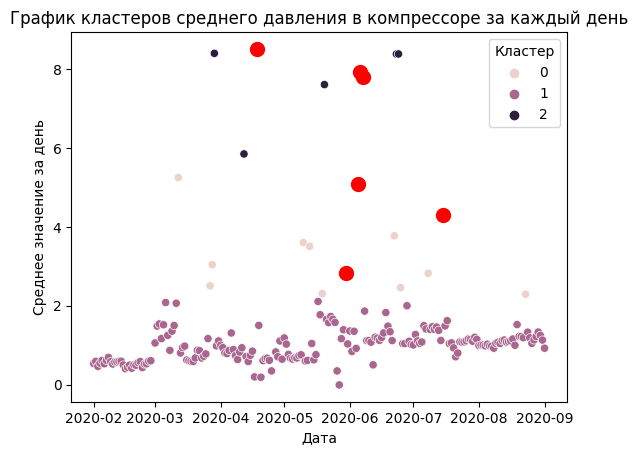

In [49]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='TP2', hue='ClustersTP2')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'TP2'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров среднего давления в компрессоре за каждый день')

# Показать график
plt.show()

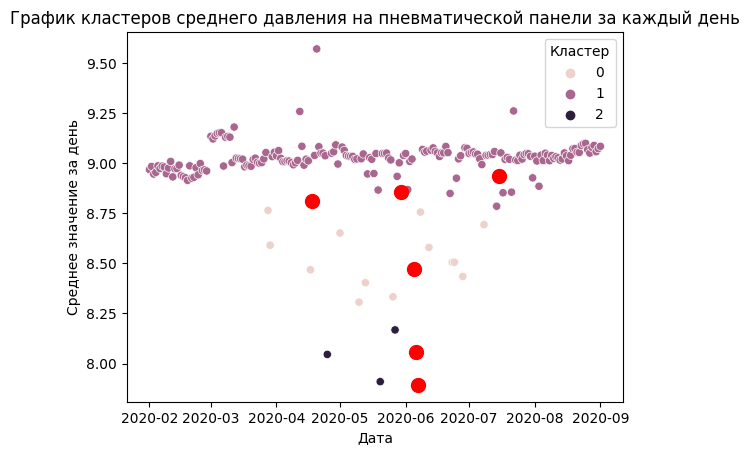

In [50]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='TP3', hue='ClustersTP3')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'TP3'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров среднего давления на пневматической панели за каждый день')

# Показать график
plt.show()

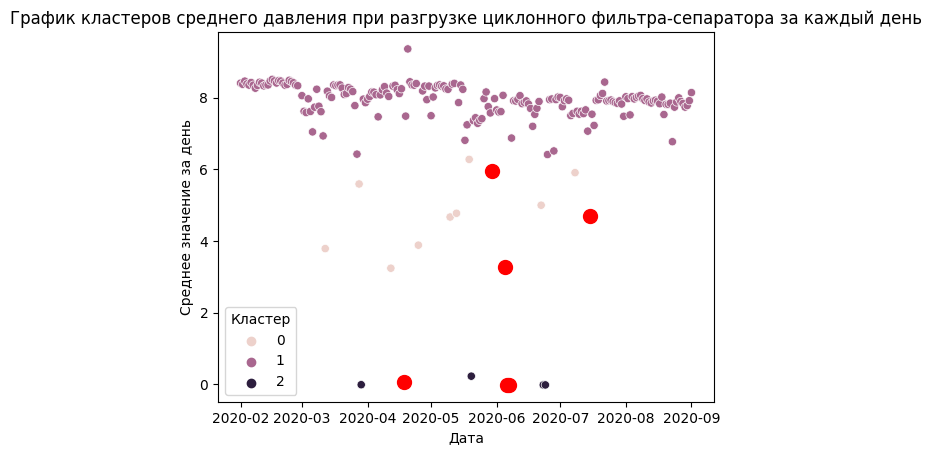

In [51]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='H1', hue='ClustersH1')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'H1'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров среднего давления при разгрузке циклонного фильтра-сепаратора за каждый день')

# Показать график
plt.show()

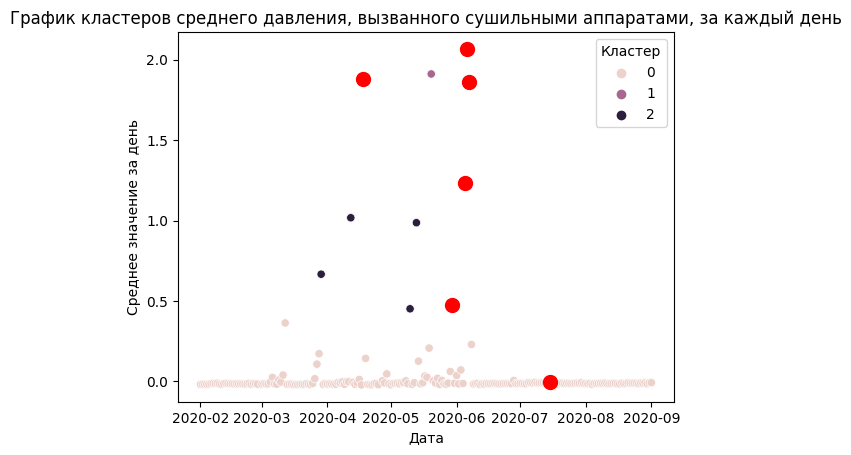

In [52]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='DV_pressure', hue='ClustersDV_pressure')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'DV_pressure'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров среднего давления, вызванного сушильными аппаратами, за каждый день')

# Показать график
plt.show()

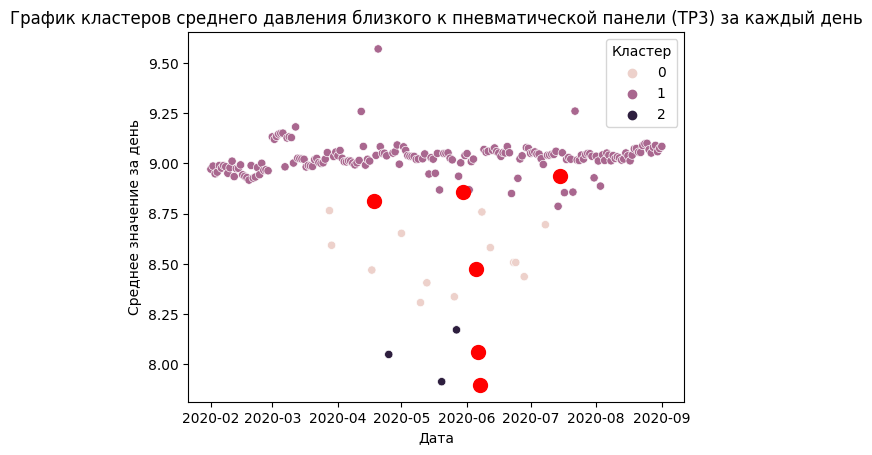

In [53]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='Reservoirs', hue='ClustersReservoirs')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'Reservoirs'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров среднего давления близкого к пневматической панели (TP3) за каждый день')

# Показать график
plt.show()

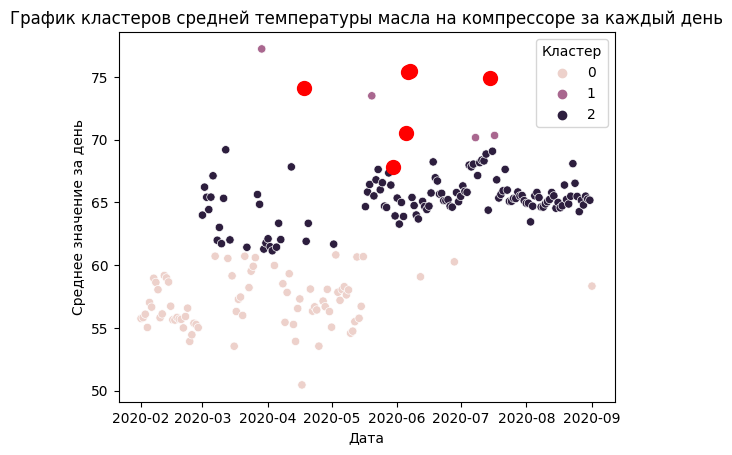

In [54]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='Oil_temperature', hue='ClustersOil_temperature')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'Oil_temperature'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров средней температуры масла на компрессоре за каждый день')

# Показать график
plt.show()

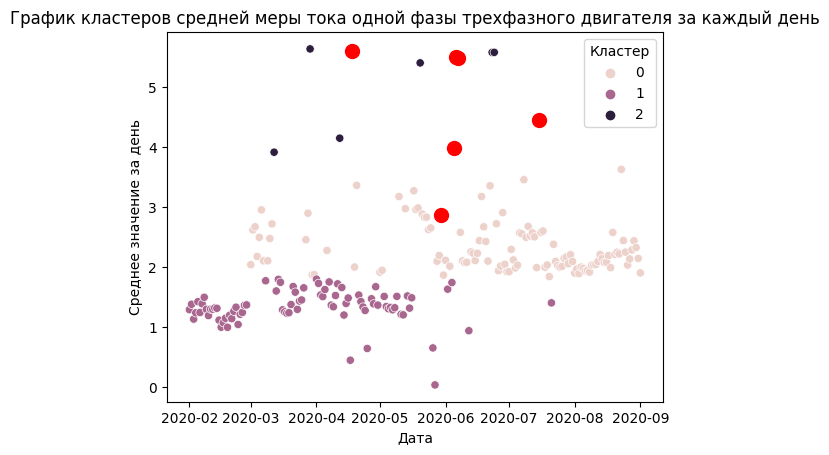

In [55]:
daily_data['timestamp'] = pd.to_datetime(daily_data['timestamp'], format='%m/%d/%Y')

# Рассчет среднего значения за день
# daily_avg = data.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()

# Даты для выделения на графике
highlight_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlight_dates = pd.to_datetime(highlight_dates, format='%m/%d/%Y')

# Построение scatter plot с цветом в зависимости от номера кластера
sns.scatterplot(data=daily_data, x='timestamp', y='Motor_current', hue='ClustersMotor_current')

# Выделение точек на графике для указанных дат
plt.scatter(x=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'timestamp'], 
            y=daily_data.loc[daily_data['timestamp'].isin(highlight_dates), 'Motor_current'],
            color='red', s=100, marker='o')

# Настройка осей и легенды
plt.xlabel('Дата')
plt.ylabel('Среднее значение за день')
plt.legend(title='Кластер')
plt.title('График кластеров средней меры тока одной фазы трехфазного двигателя за каждый день')

# Показать график
plt.show()